In [9]:
!pip install imutils
!pip install easyocr

You should consider upgrading via the 'c:\users\gamis\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Using cached easyocr-1.4-py3-none-any.whl (63.6 MB)
  Using cached opencv_python-4.5.3.56-cp38-cp38-win_amd64.whl (34.9 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\gamis\\appdata\\local\\programs\\python\\python38\\Lib\\site-packages\\cv2\\cv2.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\gamis\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install easyocr

  Using cached easyocr-1.4-py3-none-any.whl (63.6 MB)
  Using cached opencv_python-4.5.3.56-cp38-cp38-win_amd64.whl (34.9 MB)


You should consider upgrading via the 'c:\users\gamis\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import easyocr
import os
print("package imported")

package imported


import package

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import easyocr
import os

In [9]:
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        check, frame = webcam.read()
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            path = 'D:\opencv\images'
            cv2.imwrite(os.path.join(path , 'img1.jpg'), frame)
            webcam.release()
            cv2.destroyAllWindows()
            break
        elif key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break
    except(KeyboardInterrupt):
        webcam.release()
        cv2.destroyAllWindows()
        break
        

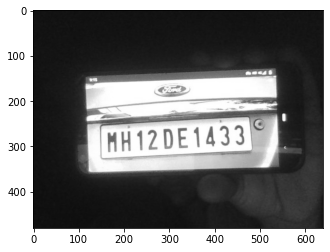

In [10]:
img = cv2.imread('D:/opencv/images/img1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

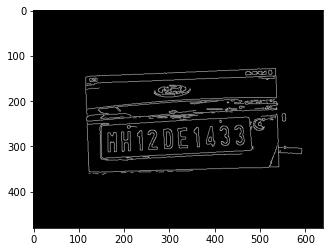

In [11]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 10, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [12]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[477, 239]],

       [[154, 254]],

       [[151, 323]],

       [[479, 309]]], dtype=int32)

In [13]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

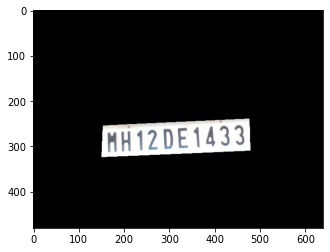

In [14]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

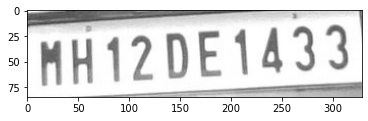

In [15]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [16]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result[0][1]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


c:\users\gamis\appdata\local\programs\python\python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


'MH12 DE4433'